This Jupyter Notebook is an implementation of Yee's Method on computing Maxwell's equations. We do three cases:
1. 1D Maxwell's equation in vacuum
2. 1D Maxwell's equation for wave entering a (linear and dispersive) medium from vacuum with zero incident angle and then leave
3. 2D Maxwell's equation in vacuum with a source current at the center


First we finish task 1: 1D Maxwell's equation in vacuum\
\
Assume the wave is propagating in direction x, with electric field pointing in the z direction and magnetic field pointing in the -y direction.

The equation we intend to solve:
$$ \frac {\partial E_z}{\partial t} = \frac {\partial B_y}{\partial x}$$
\
$$ \frac {\partial B_z}{\partial t} = \frac {\partial E_z}{\partial x}$$
\
The normalization we used: \
$x_{true} = x\frac {c}{\omega_0}$, $t_{true} = \frac {t}{\omega_0}$, $v_{true} = vc$, $E_{true} = EE_0$, and $B_{true} = BE_0$.
\
\
The updating scheme:\
\
$$E_z\left(n + \frac{1}{2}\right)_i = E_z\left(n - \frac{1}{2}\right)_i + \frac{\delta t}{\delta x} \left( B_y(n)_{i + \frac{1}{2}} - B_y(n)_{i - \frac{1}{2}} \right)$$
\
$$B_z\left(n + 1\right)_{i + \frac {1}{2}} = B_y\left(n\right)_{i + \frac {1}{2}} + \frac{\delta t}{\delta x} \left( E_z(n + \frac {1}{2})_{i + 1} - E_z(n + \frac {1}{2})_{i} \right)$$

In [ ]:
# Implementation of the Finite Difference Time Domain (Yee) method in 1D

import numpy as np

def advance_E_field(E : np.ndarray, B : np.ndarray, dx, dt):
    n = E.shape[0]
    for i in range(n):
        E[i] += dt / dx * (B[i] - B[i-1])

def advance_B_field(E : np.ndarray, B : np.ndarray, dx, dt):
    n = B.shape[0]
    for i in range(n-1):
        B[i] += dt / dx * (E[i+1] - E[i])
    B[n-1] += dt / dx * (E[0] - E[n-1])


def field_evolve_vacuum(E : np.ndarray, B : np.ndarray, dx, dt):
    """Compute evolution of electromagnetic field in vacuum in 1D using the
    FDTD method. All quantities are assumed to be dimensionless.

    Inputs:
    - E : Initial electric field at integer coordinates, t=-dt/2. Assume
      periodic boundary conditions
    - B : Initial magnetic field at half-integer coordinates, t=0.
    - dx : Standard grid size of the fields.
    - dt : Time step of field evolution.
    - step : Total number of time steps to be simulated. The system will generate
      a set of E and B field at each timestep, though the exact time at which the
      fields are calculated are different. The output arrays will have (step+1)
      entries.

    Returns:
    - E_history: Numpy array containing history of electric field evolution.
    - B_history: Numpy array containing history of magnetic field evolution.
    """

    advance_E_field(E, B, dx, dt)
    advance_B_field(E, B, dx, dt)
    return E, B

In [ ]:
import matplotlib.pyplot as plt

def gaussian(x, a, x0, sigma):
    return a * np.exp(-(x-x0)**2 / (2 * sigma))

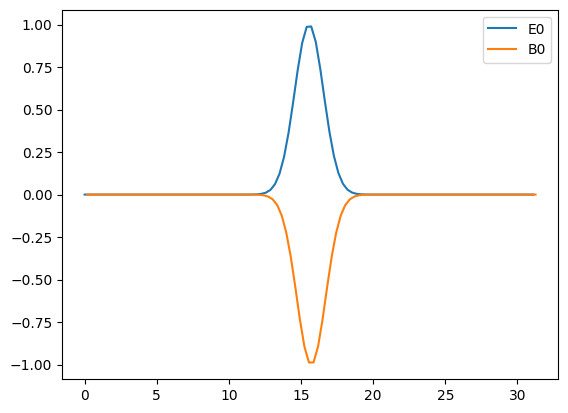

In [ ]:
dt = 0.03
k = 1
omega = 1
L = 10 * np.pi
nx = 100
dx = L / nx
x = np.arange(nx) * dx
x1 = x + dx / 2
dt = 0.95*dx
# E_0 = np.sin(k*x + omega * dt / 2) # t = -dt / 2
# B_0 = np.sin(k*x)
E_0 = gaussian(x, 1, 5*np.pi - dt / 2, 1)
B_0 = - gaussian(x1, 1, 5*np.pi, 1)
# B_0 = np.zeros_like(x1)
# E_0 = np.sin((x - dt / 2))
# B_0 = - np.sin(x1)

plt.plot(x, E_0, label='E0')
plt.plot(x1, B_0, label='B0')
plt.legend()
plt.show()

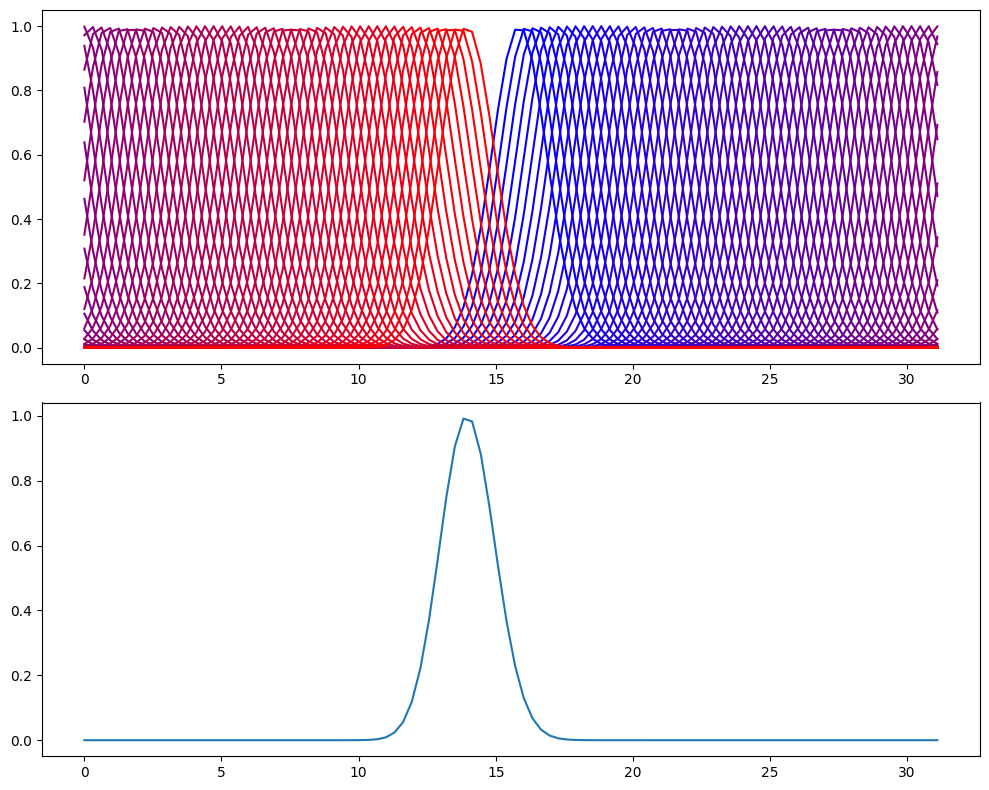

In [ ]:
step = 100
E_history = []
B_history = []
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)

for i in range(step):
    E_0, B_0 = field_evolve_vacuum(E_0, B_0, dx, dt)
    E_history.append(E_0)
    B_history.append(B_0)
    plt.plot(x, E_0, c=(i/step,0,1-i/step))

plt.subplot(2, 1, 2)
plt.plot(x,E_0)
plt.tight_layout()
plt.show()

Then we finish task 2: 1D Maxwell's equation for wave entering a (linear and dispersive) medium from vacuum with zero incident angle and then leave\
\
Assume the wave is propagating in direction x, with electric field pointing in the z direction and magnetic field pointing in the y direction.

The equation we intend to solve:
$$ \frac {\partial E_z}{\partial t} = \frac {\partial B_y}{\partial x} - J$$
\
$$ \frac {\partial B_z}{\partial t} = \frac {\partial E_z}{\partial x}$$
\
$$ \frac {\partial J}{\partial t} = \omega_p^2 E - \nu J$$
\
The normalization we used: \
$x_{true} = x\frac {c}{\omega_0}$, $t_{true} = \frac {t}{\omega_0}$, $v_{true} = vc$, $E_{true} = EE_0$, $B_{true} = BE_0$, $J_{true} = J\frac {\omega_0 E_0}{4 \pi}$, $\omega_{ptrue} = \omega_p\omega_0$, and $\nu_{true} = \nu\omega_0$
\
\
The updating scheme:\
\
$$E_z\left(n + \frac{1}{2}\right)_i = E_z\left(n - \frac{1}{2}\right)_i + \frac{\delta t}{\delta x} \left( B_y(n)_{i + \frac{1}{2}} - B_y(n)_{i - \frac{1}{2}} \right) - J\left(n - \frac {1}{2}\right)_i $$
\
$$B_y\left(n + 1\right)_{i + \frac {1}{2}} = B_y\left(n\right)_{i + \frac {1}{2}} + \frac{\delta t}{\delta x} \left( E_z(n + \frac {1}{2})_{i + 1} - E_z(n + \frac {1}{2})_{i} \right)$$
\
$$J_z\left(n + \frac{1}{2}\right)_i = J\left(n - \frac{1}{2}\right)_i + \omega_p^2E_z\left(n - \frac{1}{2}\right)_i - \nu J\left(n - \frac {1}{2}\right)_i$$

In [ ]:
def advance_JE_medium(E : np.ndarray, B : np.ndarray, J: np.ndarray, dx, dt, omega_p, nu):
    n = E.shape[0]
    J[0] += (omega_p[0] ** 2 * E[0] - nu * J[0]) * dt
    E[0] += dt / dx * (B[0] - B[n - 1]) - J[0] * dt
    for i in range(1, n):
        J[i] += (omega_p[i] ** 2 * E[i] - nu * J[i]) * dt
        E[i] += dt / dx * (B[i] - B[i - 1]) - J[i] * dt

def field_evolve_medium(E: np.ndarray, B: np.ndarray, J: np.array, dx, dt, omega_p, nu):
    advance_JE_medium(E, B, J, dx, dt, omega_p, nu)
    advance_B_field(E, B, dx, dt)
    return E, B, J

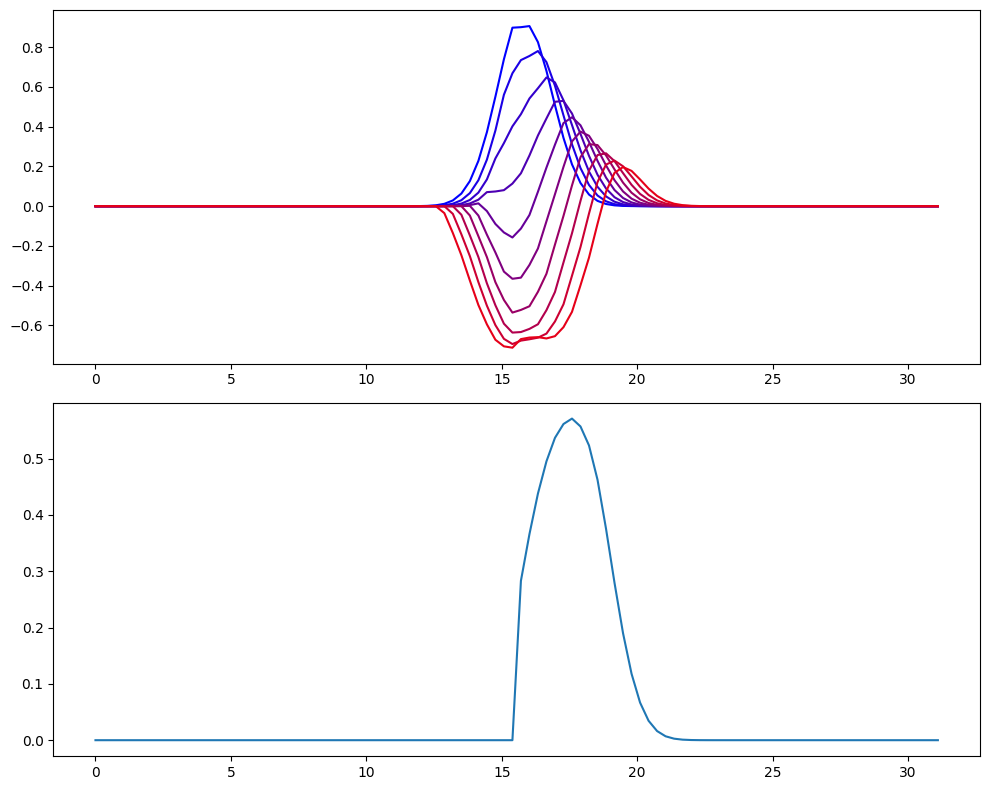

In [ ]:
E_0 = gaussian(x, 1, 5*np.pi - dt / 2, 1)
B_0 = - gaussian(x1, 1, 5*np.pi, 1)
# E_0 = np.sin((x - dt / 2))
# B_0 = - np.sin(x1)
J_0 = np.zeros_like(E_0)
omega_p = np.zeros(nx)
w_p = 1
omega_p[nx-50:nx] = w_p
omega_p[0] = w_p
omega_p[-1] = w_p
nu = 0
step = 10
E_history = []
B_history = []
J_history = []
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)

for i in range(step):

    E_0, B_0, J_0= field_evolve_medium(E_0, B_0, J_0, dx, dt, omega_p, nu)
    E_history.append(E_0)
    B_history.append(B_0)
    J_history.append(J_0)
    plt.plot(x, E_0, c=(i/step,0,1-i/step))

plt.subplot(2, 1, 2)
plt.plot(x,J_0)
plt.tight_layout()
plt.show()

First we finish task 3: 2D Maxwell's equation in vacuum with a source current at the center\
\
Assume the wave is propagating in direction x and y with electric field pointing in z direction and magnetic field pointing in both the -x and the -y direction, with initial value zero. There is a source external current J_z at the center of the x-y plane along the z-axis. $J_z = \sin^2(t)\cos(t)$

The equation we intend to solve:
$$ \frac {\partial E_z}{\partial t} = \frac {\partial B_z}{\partial x} - \frac {\partial B_x}{\partial y} - J_z$$
\
$$ \frac {\partial B_x}{\partial t} = -\frac {\partial E_z}{\partial y}$$
\
$$ \frac {\partial B_y}{\partial t} =  \frac {\partial E_z}{\partial x}$$
\
$$ J_z = \sin^2(t)\cos(t) $$
\
The normalization we used (assume this normalization in both the x, y, and z direction): \
$x_{true} = x\frac {c}{\omega_0}$, $t_{true} = \frac {t}{\omega_0}$, $v_{true} = vc$, $E_{true} = EE_0$, and $B_{true} = BE_0$.
\
\
The updating scheme:\
\
$$B_x\left(n + 1\right)_{i, j + \frac {1}{2}} = B_x\left(n\right)_{i,j+\frac {1}{2}} - \frac{\delta t}{\delta y} [ E_z(n + \frac {1}{2})_{i, j + 1} - E_z(n = \frac {1}{2})_{i, j}]$$
\
$$B_y\left(n + 1\right)_{i + \frac {1}{2}, j} = B_y\left(n\right)_{i + \frac {1}{2}, j} + \frac{\delta t}{\delta x} [ E_z(n + \frac {1}{2})_{i + 1, j} - E_z(n + \frac {1}{2})_{i, j} ]$$
\
$$E_z\left(n + \frac {1}{2}\right)_{i, j} = E_z\left(n - \frac {1}{2}\right)_{i, j} + \frac{\delta t}{\delta x} \left( B_y(n)_{i + \frac {1}{2}, j} - B_y(n )_{i - \frac {1}{2}, j} \right) - \frac{\delta t}{\delta y}\left(B_z(n)_{i, j + \frac {1}{2}} - B_z(n)_{i, j - \frac {1}{2}} \right) - J_z(n + \frac {1}{2})$$
\
$$J_z(n + \frac {1}{2}) = \sin^2((n + \frac {1}{2})dt)\cos((n + \frac {1}{2})dt)$$

In [ ]:
import numpy as np

def advance_Ez(Ez, Bx, By, Jz, dx, dy, dt, step):
    nx, ny = Ez.shape
    for i in range(nx):
        for j in range(ny):
            # Store B-field at useful positions, use %nx and %ny to include the periodic boundary condition
            Bx_right = Bx[i, (j+1) % ny]
            Bx_left = Bx[i, j]
            By_top = By[(i+1) % nx, j]
            By_bottom = By[i, j]

            # Update E-field
            Ez[i, j] += dt * ((By_top - By_bottom) / dx - (Bx_right - Bx_left) / dy - Jz(i, j, step, dt))
            print(Jz(i, j, step, dt))

def advance_Bx(Bx, Ez, dy, dt):
    nx, ny = Bx.shape
    for i in range(nx):
        for j in range(ny):
            Ez_top = Ez[i, (j+1) % ny]
            Ez_bottom = Ez[i, j]
            Bx[i, j] -= dt * (Ez_top - Ez_bottom) / dy

def advance_By(By, Ez, dx, dt):
    nx, ny = By.shape
    for i in range(nx):
        for j in range(ny):
            Ez_right = Ez[(i+1) % nx, j]
            Ez_left = Ez[i, j]
            By[i, j] += dt * (Ez_right - Ez_left) / dx

def field_evolve_2D(Ez, Bx, By, Jz, dx, dy, dt, steps):
    Ez_history = [np.copy(Ez)]
    Bx_history = [np.copy(Bx)]
    By_history = [np.copy(By)]

    for step in range(steps):
        advance_Ez(Ez, Bx, By, Jz, dx, dy, dt, step)
        advance_Bx(Bx, Ez, dy, dt)
        advance_By(By, Ez, dx, dt)

        Ez_history.append(np.copy(Ez))
        Bx_history.append(np.copy(Bx))
        By_history.append(np.copy(By))

    return Ez_history, Bx_history, By_history

# Define source current function
def Jz_func(i, j, int_t, dt):
    t = int_t*dt + dt/2
    return np.sin(t)**2 * np.cos(t)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

#Initial condition for E and B. E are defined on time t = -dt/2 and on integer spatial grids.
#B are defined on time t = 0 and on half-integer spatial grids
#All initial values for E and B are zero
omega = 1
Lx = 10 * np.pi
nx = 100
dx = L / nx
x = np.arange(nx) * dx
x1 = x + dx / 2
dt = 0.95*dx
omega = 1
Ly = 10 * np.pi
ny = 100
dy = L / ny
y = np.arange(ny) * dy
y1 = y + dy / 2
dt = 0.95*dx
steps = 50

E0z = np.zeros((nx, ny))
B0x = np.zeros((nx, ny))
B0y = np.zeros((nx, ny))
Ez_history, Bx_history, By_history = field_evolve_2D(E0z, B0x, B0y, Jz_func, dx, dy, dt, steps)

# Create x, y coordinates for the grid
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Create a surface plot
surf = ax.plot_surface(X, Y, Ez_history[-1], cmap='viridis', edgecolor='none')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Ez')
ax.set_title('3D Plot of Electric Field Ez')

# Add a color bar
fig.colorbar(surf)

# Show the plot
plt.show()

Streaming output truncated to the last 5000 lines.
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.38180928078372894
-0.3


KeyboardInterrupt

